In [23]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()
len(heart)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


303

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(f'Heart dataset contains: {heart.shape[0]} samples, {heart.shape[1] - 1} independent features and 1 target continuous variable.')

Heart dataset contains: 303 samples, 13 independent features and 1 target continuous variable.


In [7]:
 print(heart["chol"].max())

564


In [8]:
print(heart["chol"].mean())

246.26402640264027


In [9]:
print(heart["chol"].std())

51.83075098793003


In [10]:
print(heart["chol"].min())

126


In [11]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
heart[heart.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
heart[heart.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8310E0588>,
      dtype=object)

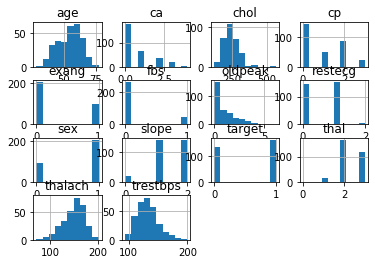

In [15]:
heart.hist()

Text(0.5, 1.0, 'Count of each Target Class')

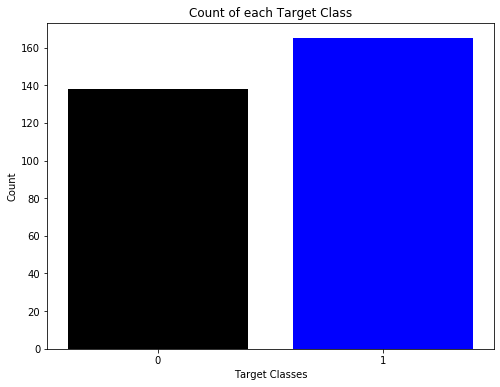

In [16]:
rcParams['figure.figsize'] = 8,6
plt.bar(heart['target'].unique(), heart['target'].value_counts(), color = ['blue', 'black'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

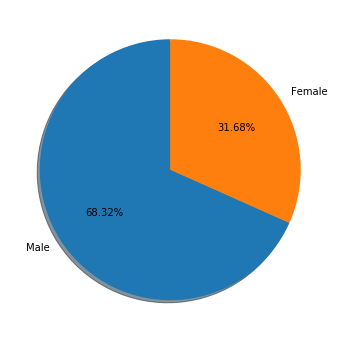

In [17]:
# Male vs Female data
male = len(heart[heart.sex == 1])
female = len(heart[heart.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

1    165
0    138
Name: target, dtype: int64


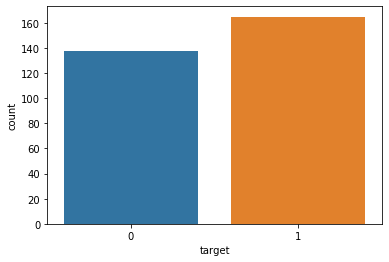

In [24]:
y = heart["target"]

sns.countplot(y)


target_temp = heart.target.value_counts()

print(target_temp)

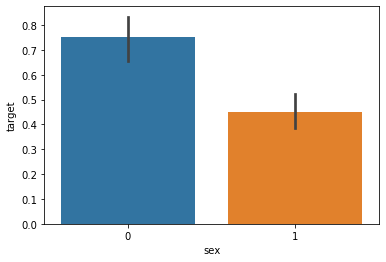

In [26]:
sns.barplot(heart["sex"],y)

In [27]:
heart["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

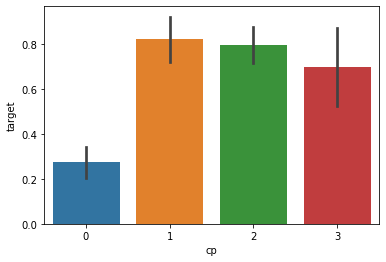

In [28]:

sns.barplot(heart["cp"],y)

In [29]:
heart["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [30]:

heart["fbs"].unique()

array([1, 0], dtype=int64)

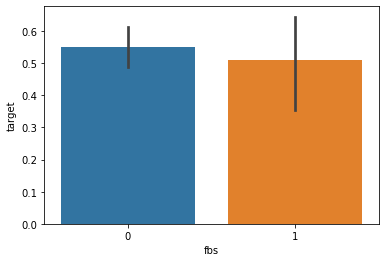

In [31]:

sns.barplot(heart["fbs"],y)

In [33]:
heart["restecg"].unique()

array([0, 1, 2], dtype=int64)

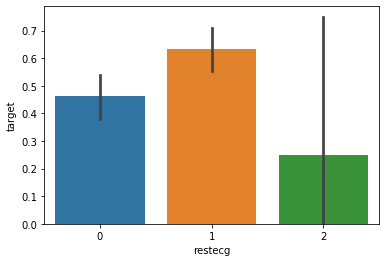

In [34]:
sns.barplot(heart["restecg"],y)

In [35]:
heart["exang"].unique()

array([0, 1], dtype=int64)

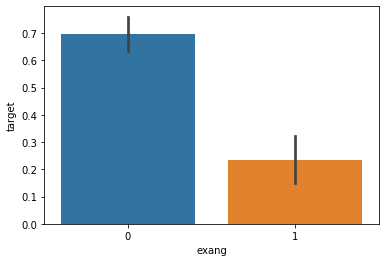

In [36]:
sns.barplot(heart["exang"],y)

In [37]:
heart["slope"].unique()

array([0, 2, 1], dtype=int64)

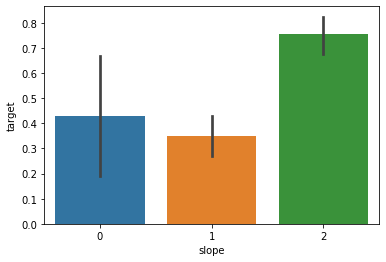

In [39]:
sns.barplot(heart["slope"],y)

In [40]:
heart["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

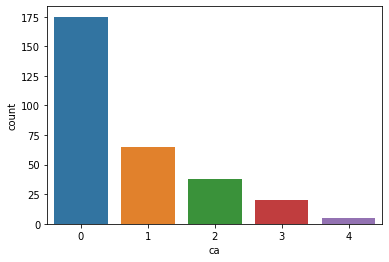

In [41]:
sns.countplot(heart["ca"])

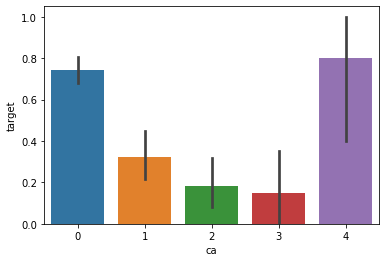

In [42]:
sns.barplot(heart["ca"],y)

In [43]:
heart["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

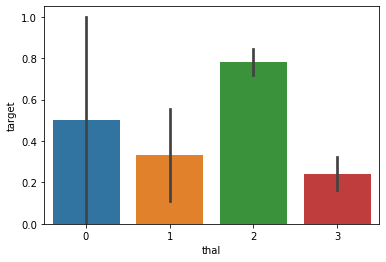

In [44]:
sns.barplot(heart["thal"],y)

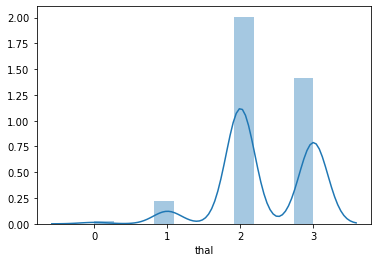

In [45]:
sns.distplot(heart["thal"])

In [46]:
from sklearn.model_selection import train_test_split

predictors = heart.drop("target",axis=1)
target = heart["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [47]:
X_train.shape

(242, 13)

In [48]:
X_test.shape

(61, 13)

In [49]:
Y_train.shape

(242,)

In [50]:
Y_test.shape

(61,)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


In [53]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [54]:
Y_pred_lr.shape

(61,)

In [55]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

In [56]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [57]:
Y_pred_svm.shape

(61,)

In [58]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [59]:

Y_pred_knn.shape

(61,)

In [60]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [61]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [62]:
print(Y_pred_dt.shape)

(61,)


In [63]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [64]:
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [65]:
Y_pred_rf.shape

(61,)

In [66]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %
